In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("loan_default.csv")

In [156]:
data.head()

,Unnamed: 0,Loan.Status,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens
0,1,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt_Consolidation,777.39,18.0,10.0,12,0,6762,43088.0,0.0,0.0
1,2,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt_Consolidation,892.09,26.7,NaN,14,0,35706,42765.0,0.0,0.0
2,3,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home_Improvements,1244.02,16.7,32.0,11,1,11275,5911.0,1.0,0.0
3,4,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt_Consolidation,990.94,10.0,NaN,21,0,7009,30172.0,0.0,0.0
4,5,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home_Improvements,503.71,16.7,25.0,13,1,16913,10851.0,1.0,0.0


In [4]:
data["Years.in.current.job"].isna().sum()

4693

In [3]:
data["Years.in.current.job"] = data["Years.in.current.job"].str.extract('(\d+)')

In [4]:
data["Years.in.current.job"].head()

0     1
1    10
2     9
3     3
4    10
Name: Years.in.current.job, dtype: object

In [5]:
data["Years.in.current.job"].isna().sum()

4693

In [8]:
data.describe()

,Unnamed: 0,Current.Loan.Amount,Credit.Score,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens
count,111107.000000,1.111070e+05,89769.000000,8.976900e+04,111107.000000,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,111107.000000,111107.000000,111107.000000
mean,55554.000000,1.147718e+07,1075.795029,7.248600e+04,971.970120,18.201003,34.902272,11.125105,0.168027,1.548314e+04,20729.533144,0.117660,0.029353
std,32073.972517,3.185508e+07,1474.133505,5.593094e+04,641.640829,7.014495,21.970696,5.010267,0.484212,1.982115e+04,13848.933792,0.351059,0.260562
min,1.000000,4.910000e+02,585.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000
25%,27777.500000,8.162000e+03,705.000000,4.468800e+04,537.755000,13.500000,16.000000,8.000000,0.000000,5.905000e+03,8616.000000,0.000000,0.000000
50%,55554.000000,1.418300e+04,724.000000,6.175200e+04,852.720000,16.900000,32.000000,10.000000,0.000000,1.102700e+04,18606.000000,0.000000,0.000000
75%,83330.500000,2.382200e+04,741.000000,8.688700e+04,1262.630000,21.700000,51.000000,14.000000,0.000000,1.933800e+04,32439.500000,0.000000,0.000000
max,111107.000000,1.000000e+08,7510.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,46625.000000,7.000000,15.000000


In [6]:
data = data.iloc[:,1:]

In [7]:
data.isna().sum()

Loan.Status                         0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    21338
Years.in.current.job             4693
Home.Ownership                      0
Annual.Income                   21338
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    59003
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                        0
Tax.Liens                           0
dtype: int64

In [8]:
data.shape

(111107, 17)

In [9]:
data["Years.in.current.job"] = data["Years.in.current.job"].fillna(0)

In [10]:
data["Years.in.current.job"] = data["Years.in.current.job"].apply(pd.to_numeric)

In [11]:
data["Years.in.current.job"] = data["Years.in.current.job"].replace(0,np.NAN)

In [12]:
data["Years.in.current.job"].describe()

count    106414.000000
mean          5.974308
std           3.500436
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Years.in.current.job, dtype: float64

In [13]:
data.isna().sum()

Loan.Status                         0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    21338
Years.in.current.job             4693
Home.Ownership                      0
Annual.Income                   21338
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    59003
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                        0
Tax.Liens                           0
dtype: int64

In [14]:
X = data.iloc[:,1:]

In [15]:
X = pd.get_dummies(X,columns=['Term','Home.Ownership','Purpose'],drop_first=True)

In [16]:
X.head()

,Current.Loan.Amount,Credit.Score,Years.in.current.job,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,...,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other,Purpose_Take_a_Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,12232,7280.0,1.0,46643.0,777.39,18.0,10.0,12,0,6762,...,0,0,0,0,0,0,0,0,0,0
1,25014,7330.0,10.0,81099.0,892.09,26.7,NaN,14,0,35706,...,0,0,0,0,0,0,0,0,0,0
2,16117,7240.0,9.0,60438.0,1244.02,16.7,32.0,11,1,11275,...,1,0,0,0,0,0,0,0,0,0
3,11716,7400.0,3.0,34171.0,990.94,10.0,NaN,21,0,7009,...,0,0,0,0,0,0,0,0,0,0
4,9789,6860.0,10.0,47003.0,503.71,16.7,25.0,13,1,16913,...,1,0,0,0,0,0,0,0,0,0


In [17]:
X_cols = X.columns

In [18]:
X_cols

Index(['Current.Loan.Amount', 'Credit.Score', 'Years.in.current.job',
       'Annual.Income', 'Monthly.Debt', 'Years.of.Credit.History',
       'Months.since.last.delinquent', 'Number.of.Open.Accounts',
       'Number.of.Credit.Problems', 'Current.Credit.Balance',
       'Maximum.Open.Credit', 'Bankruptcies', 'Tax.Liens', 'Term_Short Term',
       'Home.Ownership_Home Mortgage', 'Home.Ownership_Own Home',
       'Home.Ownership_Rent', 'Purpose_Buy_House', 'Purpose_Buy_a_Car',
       'Purpose_Debt_Consolidation', 'Purpose_Educational_Expenses',
       'Purpose_Home_Improvements', 'Purpose_Medical_Bills', 'Purpose_Other',
       'Purpose_Take_a_Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [19]:
y = data.iloc[:,0]

In [20]:
y = y.replace(['Fully Paid','Charged Off'],[1,0])

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Loan.Status, dtype: int64

In [22]:
import sys

In [24]:
#!pip install impyute

You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
from impyute.imputation.cs import mice

In [23]:
#sys.setrecursionlimit(100000)

In [26]:
imputed_X = mice(X.values)

In [27]:
imp = pd.DataFrame(imputed_X)

In [28]:
imp.columns = X_cols

In [29]:
imp.head()

,Current.Loan.Amount,Credit.Score,Years.in.current.job,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,...,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other,Purpose_Take_a_Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,12232.0,7280.0,1.0,46643.0,777.39,18.0,10.000000,12.0,0.0,6762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25014.0,7330.0,10.0,81099.0,892.09,26.7,32.033996,14.0,0.0,35706.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16117.0,7240.0,9.0,60438.0,1244.02,16.7,32.000000,11.0,1.0,11275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11716.0,7400.0,3.0,34171.0,990.94,10.0,35.943999,21.0,0.0,7009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9789.0,6860.0,10.0,47003.0,503.71,16.7,25.000000,13.0,1.0,16913.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X = imp

In [31]:
X.head()

,Current.Loan.Amount,Credit.Score,Years.in.current.job,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,...,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other,Purpose_Take_a_Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,12232.0,7280.0,1.0,46643.0,777.39,18.0,10.000000,12.0,0.0,6762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25014.0,7330.0,10.0,81099.0,892.09,26.7,32.033996,14.0,0.0,35706.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16117.0,7240.0,9.0,60438.0,1244.02,16.7,32.000000,11.0,1.0,11275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11716.0,7400.0,3.0,34171.0,990.94,10.0,35.943999,21.0,0.0,7009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9789.0,6860.0,10.0,47003.0,503.71,16.7,25.000000,13.0,1.0,16913.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X.shape

(111107, 31)

In [117]:
#data = pd.concat([X, y], axis=1)

In [118]:
#data.isnull().sum()

Current.Loan.Amount             0
Credit.Score                    0
Years.in.current.job            0
Annual.Income                   0
Monthly.Debt                    0
Years.of.Credit.History         0
Months.since.last.delinquent    0
Number.of.Open.Accounts         0
Number.of.Credit.Problems       0
Current.Credit.Balance          0
Maximum.Open.Credit             0
Bankruptcies                    0
Tax.Liens                       0
Term_Short Term                 0
Home.Ownership_Home Mortgage    0
Home.Ownership_Own Home         0
Home.Ownership_Rent             0
Purpose_Buy_House               0
Purpose_Buy_a_Car               0
Purpose_Debt_Consolidation      0
Purpose_Educational_Expenses    0
Purpose_Home_Improvements       0
Purpose_Medical_Bills           0
Purpose_Other                   0
Purpose_Take_a_Trip             0
Purpose_major_purchase          0
Purpose_moving                  0
Purpose_renewable_energy        0
Purpose_small_business          0
Purpose_vacati

In [120]:
#data.shape

(111107, 32)

In [121]:
#data.to_csv("Imputed_loan_default.csv")

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
X_train.shape

(88885, 31)

In [36]:
X_test.shape

(22222, 31)

In [37]:
y_train.shape

(88885,)

In [38]:
y_test.shape

(22222,)

In [40]:
y_train.value_counts()

1    68716
0    20169
Name: Loan.Status, dtype: int64

In [41]:
y_test.value_counts()

1    17218
0     5004
Name: Loan.Status, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
Log_reg = LogisticRegression()

In [44]:
Log_reg.fit(X_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
y_pred_train = Log_reg.predict(X_train)

In [51]:
from sklearn.metrics import accuracy_score,f1_score,recall_score

In [47]:
accuracy_score(y_train,y_pred_train)

0.814805647747089

In [48]:
predictions = pd.DataFrame(y_pred_train)

In [49]:
predictions[0].value_counts()

1    84451
0     4434
Name: 0, dtype: int64

In [52]:
f1_score(y_train, y_pred_train)

0.8925290695776505

In [53]:
recall_score(y_train,y_pred_train)

0.994717387508004

In [71]:
y_pred_test = Log_reg.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred_test)

0.8185581855818558

In [73]:
from sklearn.metrics import roc_auc_score,roc_curve
from matplotlib import pyplot 

In [74]:
probs = Log_reg.predict_proba(X_train)

In [75]:
probs = probs[:, 1]

In [76]:
auc = roc_auc_score(y_train, probs)

In [77]:
print('AUC: %.3f' % auc)

AUC: 0.692


In [78]:
fpr, tpr, thresholds = roc_curve(y_train, probs)

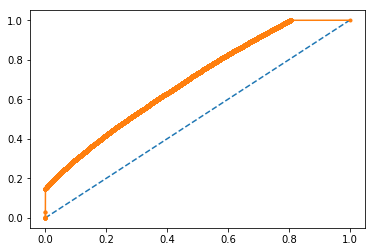

In [80]:
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [55]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [56]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [57]:
y_pred_train = clf_gini.predict(X_train)

In [58]:
y_pred_en_train = clf_entropy.predict(X_train)

In [59]:
accuracy_score(y_train,y_pred_train)*100

81.80795409799178

In [60]:
accuracy_score(y_train,y_pred_en_train)*100

81.80570399954999

In [61]:
f1_score(y_train,y_pred_train)

0.8947265625

In [62]:
recall_score(y_train,y_pred_train)

0.9999854473485069

In [63]:
f1_score(y_train,y_pred_en_train)

0.8947162834301191

In [64]:
recall_score(y_train,y_pred_en_train)

1.0

In [65]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [67]:
scoring = ['accuracy']

In [68]:
model = DecisionTreeClassifier(max_depth=4,random_state=42)

In [71]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [72]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [73]:
pred_train = model.predict(X_train)

In [75]:
accuracy_score(y_train,y_pred_train)*100

81.80795409799178

In [76]:
f1_score(y_train,pred_train)

0.8947337582437614

In [77]:
recall_score(y_train,pred_train)

1.0

In [78]:
grid = GridSearchCV(model,parameters,cv=10,return_train_score=False)

In [79]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [80]:
grid.best_params_

{'max_depth': 3}

In [81]:
grid.best_score_

0.8180795409799179

In [82]:
pred_train = grid.predict(X_train)

In [83]:
accuracy_score(y_train,pred_train)

0.8180907914721269

In [84]:
f1_score(y_train,pred_train)

0.8947337582437614

In [85]:
recall_score(y_train,pred_train)

1.0

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_train,pred_train)

array([[ 4000, 16169],
       [    0, 68716]])

RANDOM FOREST

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [92]:
rfc_pred = rfc.predict(X_train)

In [93]:
accuracy_score(y_train, rfc_pred)

0.9938684817460763

In [94]:
f1_score(y_train, rfc_pred)

0.996044964041829

In [95]:
recall_score(y_train, rfc_pred)

0.998704814017114

In [96]:
confusion_matrix(y_train, rfc_pred)

array([[19713,   456],
       [   89, 68627]])

In [97]:
rfc_pred_test = rfc.predict(X_test)

In [98]:
accuracy_score(y_test,rfc_pred_test)

0.8060030600306003

In [99]:
confusion_matrix(y_test,rfc_pred_test)

array([[ 1716,  3288],
       [ 1023, 16195]])

In [100]:
f1_score(y_test,rfc_pred_test)

0.8825372605651073

In [101]:
recall_score(y_test,rfc_pred_test)

0.9405854338482983

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
parameters = {'max_features':np.arange(1,10),'max_depth':np.arange(1,6)}

In [105]:
tune_model = GridSearchCV(rfc,parameters,cv=10,scoring='accuracy')

In [106]:
tune_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [107]:
tune_model.best_params_

{'max_depth': 5, 'max_features': 9}

In [108]:
tune_model.best_score_

0.8180795409799179

In [109]:
y_pred_tr = tune_model.predict(X_train)

In [110]:
accuracy_score(y_train,y_pred_tr)

0.8182595488552624

In [111]:
confusion_matrix(y_train,y_pred_tr)

array([[ 4016, 16153],
       [    1, 68715]])

In [112]:
f1_score(y_train,y_pred_tr)

0.8948197728930098

In [113]:
recall_score(y_train,y_pred_tr)

0.9999854473485069

RESAMPLING TECHNIQUE

In [114]:
from sklearn.utils import resample

In [115]:
X = pd.concat([X_train, y_train], axis=1)

In [116]:
X.head()

,Current.Loan.Amount,Credit.Score,Years.in.current.job,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,...,Purpose_Medical_Bills,Purpose_Other,Purpose_Take_a_Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan.Status
25947,10119.0,1259.188885,6.0,68140.055741,1028.09,17.3,32.000000,13.0,0.0,13209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6623,99999999.0,748.000000,4.0,84112.000000,473.14,24.6,32.730635,10.0,0.0,7539.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
65648,16122.0,741.000000,9.0,115874.000000,652.75,17.1,32.000000,4.0,0.0,20363.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10121,99999999.0,729.000000,1.0,101860.000000,1111.98,22.6,53.000000,10.0,0.0,8166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
20076,9588.0,1055.137054,2.0,75545.342679,858.79,31.1,32.054313,5.0,0.0,2014.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [118]:
not_default = X[X["Loan.Status"]==0]

In [119]:
default = X[X["Loan.Status"]==1]

In [120]:
X['Loan.Status'].value_counts()

1    68716
0    20169
Name: Loan.Status, dtype: int64

In [121]:
notdefault_upsampled = resample(not_default,
                          replace=True, # sample with replacement
                          n_samples=len(default), # match number in majority class
                          random_state=27) # reproducible results

In [122]:
upsampled = pd.concat([notdefault_upsampled, default])

In [123]:
upsampled['Loan.Status'].value_counts()

1    68716
0    68716
Name: Loan.Status, dtype: int64

In [125]:
y_train = upsampled['Loan.Status']
X_train = upsampled.drop("Loan.Status", axis=1)

In [126]:
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [127]:
upsampled_pred = upsampled.predict(X_train)

In [129]:
accuracy_score(y_train,upsampled_pred)

0.6248399208335759

In [130]:
f1_score(y_train,upsampled_pred)

0.6082291706242163

In [131]:
recall_score(y_train,upsampled_pred)

0.582440770708423

In [132]:
default_downsampled = resample(default,
                                replace = False, # sample without replacement
                                n_samples = len(not_default), # match minority n
                                random_state = 27) # reproducible results


In [133]:
downsampled = pd.concat([not_default, default])

In [134]:
downsampled['Loan.Status'].value_counts()

1    68716
0    20169
Name: Loan.Status, dtype: int64

USING ANN

In [124]:
X = X.values

In [125]:
y = y.values

In [126]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
onehotencoder = OneHotEncoder(categorical_features = [1])

In [128]:
X = onehotencoder.fit_transform(X).toarray()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [132]:
classifier = Sequential()

In [133]:
classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu', input_dim = 785))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=785, units=30, kernel_initializer="uniform")`
  if __name__ == '__main__':


In [134]:
classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
  if __name__ == '__main__':


In [135]:
classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
  if __name__ == '__main__':


In [136]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':


In [137]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [138]:
classifier.fit(X_train, y_train,batch_size=10, nb_epoch = 25)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/25
88885/88885 [==============================] - 43s 480us/step - loss: 0.4446 - acc: 0.8132
Epoch 2/25
88885/88885 [==============================] - 41s 459us/step - loss: 0.4272 - acc: 0.8182
Epoch 3/25
88885/88885 [==============================] - 42s 471us/step - loss: 0.4248 - acc: 0.8186
Epoch 4/25
88885/88885 [==============================] - 42s 469us/step - loss: 0.4232 - acc: 0.8189
Epoch 5/25
88885/88885 [==============================] - 46s 512us/step - loss: 0.4216 - acc: 0.8189
Epoch 6/25
88885/88885 [==============================] - 45s 503us/step - loss: 0.4202 - acc: 0.8190
Epoch 7/25
88885/88885 [==============================] - 46s 516us/step - loss: 0.4184 - acc: 0.8192
Epoch 8/25
88885/88885 [==============================] - 44s 495us/step - loss: 0.4167 - acc: 0.8193
Epoch 9/25
88885/88885 [==============================] - 49s 550us/step - loss: 0.4149 - acc: 0.81990s - loss: 0.4148
Epoch 10/25
88885/88885 [==============================] - 46s 52

In [139]:
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)

In [141]:
cm

array([[ 5973, 14196],
       [  748, 67968]])

In [142]:
(5973+67968)/(5973+14196+748+67968)

0.8318726444281938

In [143]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

In [145]:
cm

array([[ 1309,  3695],
       [  361, 16857]])

In [146]:
(1309+16857)/(1309+3695+361+16857)

0.8174781747817478